In [1]:
!git clone https://github.com/k488-bit/Challenge_CdeCMx

Cloning into 'Challenge_CdeCMx'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 169 (delta 12), reused 0 (delta 0), pack-reused 145
Receiving objects: 100% (169/169), 7.51 MiB | 27.95 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import xlrd
import math
import imageio
import os,sys
import time
import datetime

Generando gif de apple
Creando gif
Graficando


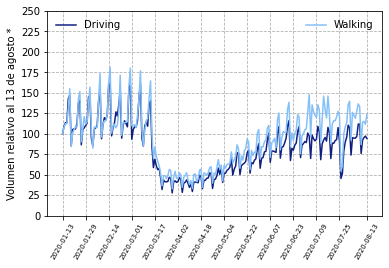

In [7]:
#<-----------------------Funcion para la eliminacion de los valores vacios---------------->
def value_correction(value,day,data,pos):
    if value!="":
        data=np.append(data,float(value))
        pos=np.append(pos,day)
    return data,pos
#<------------------------Funcion para generar el gif---------------------------->
def create_gif(filenames, duration,name):
	images = []
	for filename in filenames:
		images.append(imageio.imread(filename))
	output_file="Animation_"+name+".gif"
	imageio.mimsave(output_file, images, duration=duration)
#<-----------------------Funcion llamar a crear el gif--------------------------->
def generate_gif_apple():
    #<-----------------------Proceso para crear el gif de Apple------------------------------------->
    print("Generando gif de apple")
    for i in range(3,n_data):
        lim=math.ceil(i/14)
        x=np.arange(0,i-lim,lim)
        x=np.append(x,i-1)
        plt.subplots_adjust(left=0.125,right=0.9,bottom=0.23,top=0.94)
        plt.plot(np.arange(i),data_driving[0:i],label="Driving",color="#C6D4E1")
        plt.plot(np.arange(i),data_walking[0:i],label="Walking",color="#44749D")
        #<-----------------------Ploteo del grid------------------------------------>
        plt.grid(ls="--")
        plt.xticks(x,pos_driving[x],rotation=60,fontsize="x-small")
        plt.ylim(0,250)
        plt.yticks(np.arange(0,275,25))
        plt.legend(frameon=False,ncol=2,mode="expand")
        plt.savefig(str(i)+".png")
        plt.clf()
    print("Creando gif")
    #<-----------------------Creacion del gif------------------------------------>
    duration = 0.15
    filenames = sorted(filter(os.path.isfile, [x for x in os.listdir() if x.endswith(".png")]), key=lambda p: os.path.exists(p) and os.stat(p).st_mtime or time.mktime(datetime.now().timetuple()))
    create_gif(filenames, duration,"apple")
    os.system("del *.png")
#<-----------------------Formato de fecha de excel---------------------->
def xlsxdate(xldate):
    return str(datetime.datetime(1899, 12, 30)+ datetime.timedelta(days=xldate))[0:10]
#<-----------------------Inicio del ploteo de Apple------------------------->
file="/content/Challenge_CdeCMx/Data/applemobilitytrends-2020-08-13.csv"
#<-----------------------Lectura de la informacion---------------------------->
data_apple=np.loadtxt(file,skiprows=602,max_rows=2,dtype=str,delimiter=",")
dates=np.transpose(np.loadtxt(file,max_rows=1,dtype=str,delimiter=",")[6:])
#<-----------------------Organizacion de la informacion en dos columnas--------------->
data_apple=np.transpose(data_apple[:,6:])
data_driving=[];data_walking=[];pos_driving=[];pos_walking=[]
#<-----------------------Eliminacion de valores vacios------------------------->
for data,date in zip(data_apple,dates):
    data_driving,pos_driving=value_correction(data[0],date,data_driving,pos_driving)
    data_walking,pos_walking=value_correction(data[1],date,data_walking,pos_walking)
#<-----------------------Cantidad de valores-------------------------->
n_data=np.size(pos_driving)
#<-----------------------Proceso para crear el gif------------------------------------->
generate_gif_apple()
#<-----------------------Dimensiones del ploteo--------------------------->
print("Graficando")
plt.subplots_adjust(left=0.125,right=0.9,bottom=0.23,top=0.94)
plt.plot(np.arange(n_data),data_driving,label="Driving",color="#0F2080")
plt.plot(np.arange(n_data),data_walking,label="Walking",color="#85C0F9")
lim=math.ceil(n_data/14)
x=np.arange(0,n_data-lim,lim)
x=np.append(x,n_data-1)
plt.ylabel("Volumen relativo al 13 de agosto *")
#<-----------------------Ploteo del grid------------------------------------>
plt.grid(ls="--")
plt.xticks(x,pos_driving[x],rotation=60,fontsize="x-small")
plt.ylim(0,250)
plt.yticks(np.arange(0,275,25))
plt.legend(frameon=False,ncol=2,mode="expand")
plt.savefig('/content/Challenge_CdeCMx/Images/Figura_Mobility_Apple.png', bbox_inches='tight')
plt.show()